<a href="https://colab.research.google.com/github/aayushhiii/Unsupervised_clustering/blob/main/clustering(iris).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Prediction using Unsupervised ML

###Iris Dataset

###Let us first import our dataset from Goggle Drive

In [ ]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
link = 'https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view'

In [ ]:
import pandas as pd
  
# to get the id part of the file
id = link.split("/")[-2]
  
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Iris.csv')  
  
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


###EDA
###Now performing some basic operations on it.

In [ ]:
df=df.drop('Id', axis =1)

In [ ]:
df.shape

(150, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


###Now let us check if there is any NULL value in the dataset

In [ ]:
df.isnull().any()

SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

###We first import all the necessary libraries

In [ ]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans


###Detecting X and Y

In [ ]:
x = df.iloc[:, [0,1,2,3]].values

###arbitrarily assigning the value of k as 5

In [ ]:
kmeans5 = KMeans(n_clusters=5)
y_kmeans5 = kmeans5.fit_predict(x)
print(y_kmeans5)



[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 2 3 3 3 2 3 2 2 3 2 3 2 3 3 2 3 2 3 2 3 3
 3 3 3 3 3 2 2 2 2 3 2 3 3 3 2 2 2 3 2 2 2 2 2 3 2 2 0 3 4 0 0 4 2 4 0 4 0
 0 0 3 0 0 0 4 4 3 0 3 4 3 0 4 3 3 0 4 4 4 0 3 3 4 0 0 3 0 0 0 3 0 0 0 3 0
 0 3]


In [ ]:
kmeans5.cluster_centers_

array([[6.52916667, 3.05833333, 5.50833333, 2.1625    ],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [5.508     , 2.6       , 3.908     , 1.204     ],
       [6.20769231, 2.85384615, 4.74615385, 1.56410256],
       [7.475     , 3.125     , 6.3       , 2.05      ]])

###Let's find the optimal number of clusters in a dataset using Elbow Method

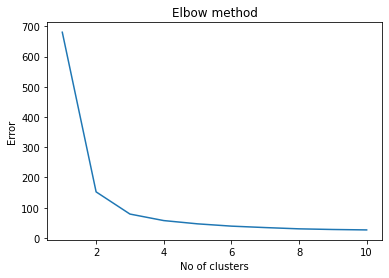

In [ ]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

### shape of elbow is approximately formed at k=3 (by observing elbow method)

In [ ]:
kmeans3=KMeans(n_clusters=3)
y_kmeans3=kmeans3.fit_predict(x)
print(y_kmeans3)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


In [ ]:
kmeans3.cluster_centers_

array([[5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [ ]:
df['Cluster_Id'] = kmeans.labels_
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Cluster_Id
0,5.1,3.5,1.4,0.2,Iris-setosa,4
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,4
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,3
146,6.3,2.5,5.0,1.9,Iris-virginica,6
147,6.5,3.0,5.2,2.0,Iris-virginica,3
148,6.2,3.4,5.4,2.3,Iris-virginica,3


###Visualizing Clustering

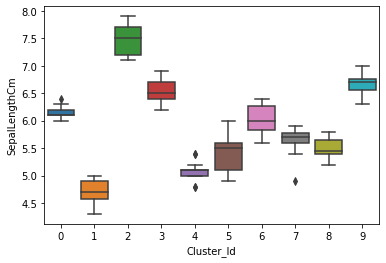

In [ ]:
import seaborn as sns
sns.boxplot(x='Cluster_Id', y='SepalLengthCm', data=df)

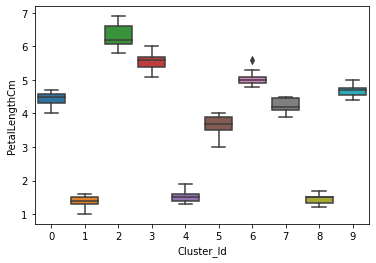

In [ ]:
sns.boxplot(x='Cluster_Id', y='PetalLengthCm', data=df)

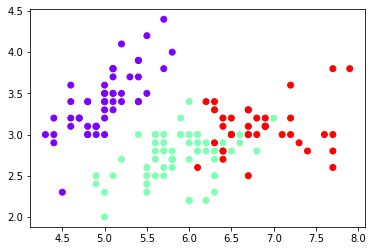

In [ ]:
plt.scatter(x[:,0],x[:,1],c=y_kmeans3,cmap='rainbow')